In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from cmdstanpy import CmdStanModel
from matplotlib import pyplot as plt

# Load and inspect data

In [2]:
df = pd.read_csv("data/data7a.csv")
print(len(df))
df.head(5)

100


,id,y
0,1,0
1,2,2
2,3,7
3,4,8
4,5,1


In [3]:
df.groupby("y").count()

,id
y,
0,19
1,15
2,10
3,3
4,6
5,4
6,6
7,17
8,20


<AxesSubplot:xlabel='y', ylabel='Count'>

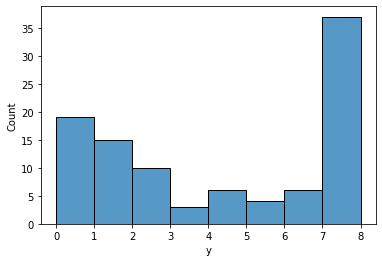

In [4]:
sns.histplot(x=df["y"])

# Run Stan

In [5]:
model = CmdStanModel(stan_file="model/exercise8-6.stan")
print(model)

INFO:cmdstanpy:compiling stan program, exe file: /workdir/chapter08/model/exercise8-6
INFO:cmdstanpy:compiler options: stanc_options=None, cpp_options=None
INFO:cmdstanpy:compiled model file: /workdir/chapter08/model/exercise8-6


CmdStanModel: name=exercise8-6
	 stan_file=/workdir/chapter08/model/exercise8-6.stan
	 exe_file=/workdir/chapter08/model/exercise8-6
	 compiler_optons=stanc_options=None, cpp_options=None


In [6]:
data = {
    "I": len(df),
    "y": df["y"].values
}

In [7]:
fit =  model.sample(data=data)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:start chain 2
INFO:cmdstanpy:start chain 3
INFO:cmdstanpy:start chain 4
INFO:cmdstanpy:finish chain 4
INFO:cmdstanpy:finish chain 2
INFO:cmdstanpy:finish chain 3
INFO:cmdstanpy:finish chain 1


In [8]:
print(fit.diagnose())

INFO:cmdstanpy:Processing csv files: /tmp/tmpxnvkdixz/exercise8-6-202010271233-1-so4w_6jq.csv, /tmp/tmpxnvkdixz/exercise8-6-202010271233-2-7na5fti_.csv, /tmp/tmpxnvkdixz/exercise8-6-202010271233-3-xs13ejet.csv, /tmp/tmpxnvkdixz/exercise8-6-202010271233-4-i4xzedld.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


Processing csv files: /tmp/tmpxnvkdixz/exercise8-6-202010271233-1-so4w_6jq.csv, /tmp/tmpxnvkdixz/exercise8-6-202010271233-2-7na5fti_.csv, /tmp/tmpxnvkdixz/exercise8-6-202010271233-3-xs13ejet.csv, /tmp/tmpxnvkdixz/exercise8-6-202010271233-4-i4xzedld.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory for all transitions.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.


# Interpret the result

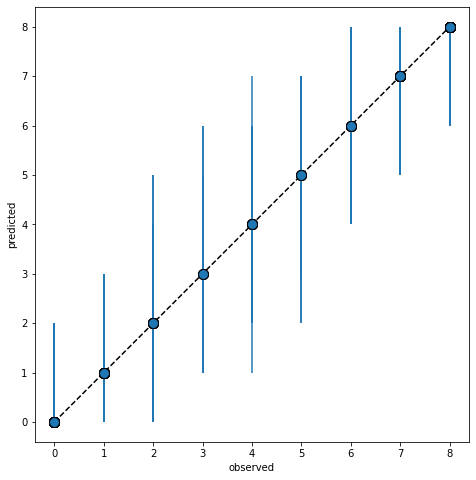

In [9]:
# observation vs. prediction

y_pred_percentiles = np.percentile(fit.stan_variable("y_pred"), [10.0, 50.0, 90.0], axis=0)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)

ax.errorbar(
    x=df["y"],
    y=y_pred_percentiles[1], 
    yerr=np.abs(y_pred_percentiles[[0, 2]] - y_pred_percentiles[1]),
    fmt='o',
    markersize=10,
    markeredgecolor='k',
    label="f=C"
)

ax.plot([0.0, 8.0], [0.0, 8.0], 'k--')
ax.set_aspect("equal")
ax.set_xlabel("observed")
ax.set_ylabel("predicted")
fig.show()

In [10]:
fit.summary().loc["s_X"]

Mean          3.0
MCSE          0.0
StdDev        0.4
5%            2.4
50%           3.0
95%           3.7
N_Eff      1079.6
N_Eff/s     432.9
R_hat         1.0
Name: s_X, dtype: float64

In [11]:
np.exp(6)

403.4287934927351

個体差のばらつきは、オッズの比率で見ると、exp(6) ~ 400倍程度ある。

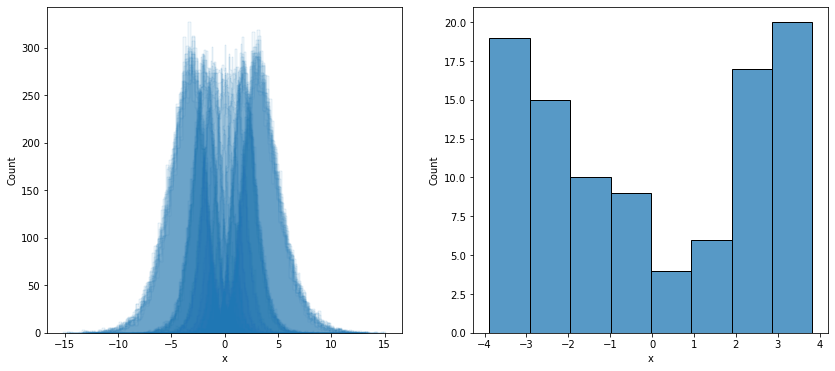

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
for i in range(len(df)):
    sns.histplot(ax=axes[0], x=fit.stan_variable("x")[:, i], linewidth=0.1, color="C0", alpha=0.05, element="step")

means = fit.stan_variable("x").mean(axis=0)
sns.histplot(ax=axes[1], x=means)

axes[0].set_xlabel("x")
axes[1].set_xlabel("x")
fig.show()